In [20]:
import sys
from sklearn import linear_model
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# 1. Loading the Data

### 1st Way

In [2]:
better_life_index_path = os.path.abspath('better_life_index_oecd.csv')
gdp_path = os.path.abspath("gross_domestic_product_imf.csv")

print(better_life_index_path)
print(gdp_path)

a:\Development\Hands-on-Machine-Learning\linear_regression\better_life_index_oecd.csv
a:\Development\Hands-on-Machine-Learning\linear_regression\gross_domestic_product_imf.csv


### 2nd Way

In [3]:
path = os.getcwd() # Get the current working directory
path = os.path.dirname(path) # To go a folder up from path
path = os.path.join(path, 'dataset')

print(path)
better_life_index_path = os.path.join(path,'better_life_index_oecd.csv' )
gdp_path = os.path.join(path, "gross_domestic_product_imf.csv")

a:\Development\Hands-on-Machine-Learning\dataset


In [4]:
better_life_index  = pd.read_csv( better_life_index_path)
gdp = pd.read_csv(gdp_path)

# 2. Visulaizing Data

### We are going to work with Country column and value column
### Just selecting the row with INEQUALITY == "TOT"(Total value of Better life index)

### We are going to work with Country column and gdp of 2020 column

In [5]:
better_life_index.head(5)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


### Subject Descriptor = Gross domestic product per capita, constant prices
### Units = U.S. dollars
### Country/Series-specific Notes = See notes for:  Gross domestic product, current prices (National currency) Population (Persons).

In [6]:
gdp.head(5)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,255.29","1,270.22","1,319.90","1,253.91","1,304.06","1,363.06","1,424.40","1,481.50","1,540.94",2019.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,2.647,1.189,3.912,-5,4,4.524,4.5,4.009,4.012,2019.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,285.46","1,327.69","1,469.60","1,465.92","1,597.74","1,741.83","1,893.02","2,047.67","2,215.01",2019.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,18.91,18.401,18.876,19.006,19.692,20.829,22.022,23.169,24.372,2019.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,74.712,77.416,81.88,78.884,83.852,89.205,94.908,100.6,106.685,2019.0


# 3. Manipulating Data

In [7]:
def prepare_country_stats(bli, gdp):
    bli = bli[bli["INEQUALITY"] == 'TOT']
    bli = bli.pivot(index = "Country", columns = "Indicator", values = "Value")
    
    gdp.rename(columns = {"2020": "GDP per capita"}, inplace = True)
    gdp = gdp[ gdp["Subject Descriptor"] == "Gross domestic product, current prices" ]
    gdp = gdp[ gdp["Units"] == "U.S. dollars" ]
    gdp.set_index("Country", inplace = True)

    full_country_stats = pd.merge(left = bli, right = gdp, left_index= True, right_index= True)
    full_country_stats = full_country_stats[["GDP per capita", 'Life satisfaction']]

    full_country_stats['GDP per capita'] = full_country_stats['GDP per capita'].str.replace(",","")
    full_country_stats['GDP per capita'] = full_country_stats["GDP per capita"].astype(float)
    full_country_stats.sort_values(by = ["GDP per capita"], inplace= True, ascending = False)

    return full_country_stats

In [9]:
full_country_stats = prepare_country_stats(better_life_index, gdp)
full_country_stats.head(5)

,GDP per capita,Life satisfaction
Country,,
United States,20807.27,6.9
Japan,4910.58,5.9
Germany,3780.55,7.0
United Kingdom,2638.30,6.8
France,2551.45,6.5


# 4. Visualizing the Manipulation


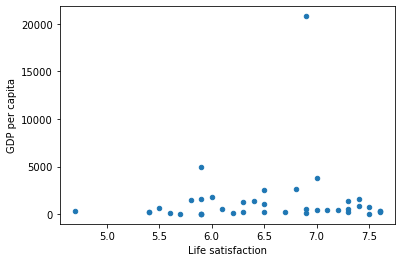

In [15]:
%matplotlib inline
full_country_stats.plot(kind = "scatter", x = "Life satisfaction", y = "GDP per capita")
plt.show()

# 5. Preparing the Data

In [33]:
X = np.c_[full_country_stats['Life satisfaction']]
Y = np.c_[full_country_stats['GDP per capita']]

In [35]:
model = sklearn.linear_model.LinearRegression()
model.fit(X,Y)

LinearRegression()

In [36]:
X_new = [[4]]  # Cyprus' GDP per capita
print(model.predict(X_new))

[[511.54899089]]


In [37]:
model.coef_
model.intercept_

array([-826.29058955])

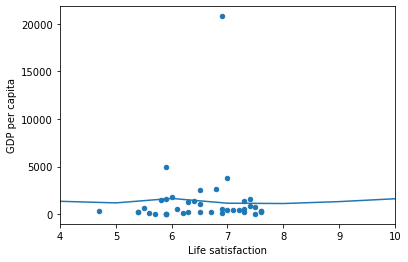

In [41]:
full_country_stats.plot(kind = "scatter", x = "Life satisfaction", y = "GDP per capita")
plt.plot(model.predict(X))
plt.xlim(4, 10)
plt.show()

NameError: name 'data' is not defined